In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [69]:
print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of x_test: {}'.format(x_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [71]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

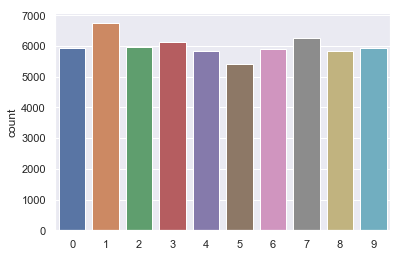

In [36]:
sns.set()
sns.countplot(y_train)

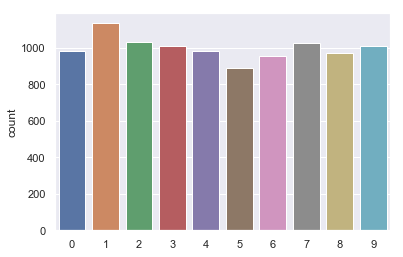

In [37]:
sns.countplot(y_test)

We have almost similar distribution for both training and test dataset.

In [75]:
x_trainnorm = x_train/255
x_testnorm = x_test/255

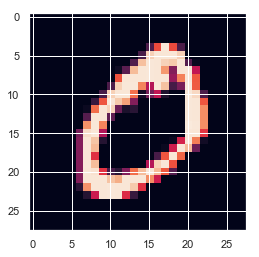

In [76]:
plt.imshow(x_train[1][:,:,0])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x_trainnorm, y_train, test_size=0.2, random_state=42)

Converting labels into one hot encoding

In [41]:
num_classes = 10   # 0-9 digits

y_train = to_categorical(y_train,num_classes)
y_val = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)

5 layer CNN Model

In [96]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())                     ## Flattening out of the network to one dimensional vec
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
__________